In [6]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import  tensorflow as tf
from tensorflow import keras
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')


In [5]:
df=pd.read_csv('../Dataset/ny_taxi_data.csv')
df.head()


,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag
0,id2875421,2,14-03-2016 17:24,14-03-2016 17:32,1,-73.982155,40.767937,-73.964630,40.765602,N
1,id2377394,1,12-06-2016 00:43,12-06-2016 00:54,1,-73.980415,40.738564,-73.999481,40.731152,N
2,id3858529,2,19-01-2016 11:35,19-01-2016 12:10,1,-73.979027,40.763939,-74.005333,40.710087,N
3,id3504673,2,06-04-2016 19:32,06-04-2016 19:39,1,-74.010040,40.719971,-74.012268,40.706718,N
4,id2181028,2,26-03-2016 13:30,26-03-2016 13:38,1,-73.973053,40.793209,-73.972923,40.782520,N


In [11]:
data=df['passenger_count'].values
data

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

### Step 3: Data Preprocessing

In [12]:
scaler = MinMaxScaler()
data = scaler.fit_transform(data.reshape(-1, 1))

sequence_length = 5  # Adjust this as needed
sequences = []
targets = []

for i in range(len(data) - sequence_length):
    sequences.append(data[i:i+sequence_length])
    targets.append(data[i+sequence_length])

sequences = np.array(sequences)
targets = np.array(targets)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(sequences, targets, test_size=0.2, random_state=42)

In [15]:
X_train.shape

(12876, 5, 1)

### Step 4: Build and Train RNN Model

In [19]:
model_rnn = keras.Sequential(name="RNN")
model_rnn.add(keras.layers.SimpleRNN(100, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model_rnn.add(keras.layers.Dense(1))
model_rnn.compile(optimizer='adam', loss='mean_squared_error')

In [26]:
from tensorflow.keras import layers, models

model_rnn = models.Sequential(name="RNN")
model_rnn.add(layers.SimpleRNN(100, activation='relu', return_sequences=True, 
                               input_shape=(X_train.shape[1], 1)))
model_rnn.add(layers.SimpleRNN(50, activation='relu'))
model_rnn.add(layers.Dropout(0.3))
model_rnn.add(layers.Dense(64, activation='relu'))
model_rnn.add(layers.Dense(32, activation='relu'))
model_rnn.add(layers.Dense(1))

model_rnn.compile(optimizer="RMSprop", loss='mean_squared_error')

In [28]:
model_rnn.fit(X_train, y_train, epochs=10, batch_size=16, verbose=2)

Epoch 1/10
805/805 - 2s - 3ms/step - loss: 0.0705
Epoch 2/10
805/805 - 2s - 3ms/step - loss: 0.0705
Epoch 3/10
805/805 - 2s - 3ms/step - loss: 0.0704
Epoch 4/10
805/805 - 2s - 3ms/step - loss: 0.0705
Epoch 5/10
805/805 - 2s - 3ms/step - loss: 0.0704
Epoch 6/10
805/805 - 2s - 3ms/step - loss: 0.0706
Epoch 7/10
805/805 - 2s - 3ms/step - loss: 0.0706
Epoch 8/10
805/805 - 2s - 3ms/step - loss: 0.0705
Epoch 9/10
805/805 - 2s - 3ms/step - loss: 0.0705
Epoch 10/10
805/805 - 2s - 3ms/step - loss: 0.0705


### Step 5: Build and Train LSTM Model

In [29]:
model_lstm = keras.Sequential(name="LSTM")
model_lstm.add(keras.layers.LSTM(100, activation='relu', input_shape=(X_train.shape[1], 1)))
model_lstm.add(keras.layers.Dense(1))
model_lstm.compile(optimizer='adam', loss='mean_squared_error')

In [37]:
model_lstm.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)

Epoch 1/100
403/403 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0707
Epoch 2/100
403/403 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0702
Epoch 3/100
403/403 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0688
Epoch 4/100
403/403 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0711
Epoch 5/100
403/403 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0717
Epoch 6/100
403/403 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0709
Epoch 7/100
403/403 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0696
Epoch 8/100
403/403 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0709
Epoch 9/100
403/403 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0687
Epoch 10/100
403/403 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0716
Epoch 11/100
403/403 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0709
Epoch 12/100
403/403 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0688
Epoch 13/100
403/403 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0689
Epoch 14/100
403/403 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0702
Epoch 15/100
403/403 ━━━━━━━━━━━━━━━━━━━━ 1

### Step 6: Build and Train GRU Model

In [38]:
model_gru = keras.Sequential(name="GRU")
model_gru.add(keras.layers.GRU(100, activation='relu', input_shape=(X_train.shape[1], 1)))
model_gru.add(keras.layers.Dense(1))
model_gru.compile(optimizer='adam', loss='mean_squared_error')

In [39]:
model_gru.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1)

Epoch 1/10
403/403 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0714
Epoch 2/10
403/403 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0710
Epoch 3/10
403/403 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0696
Epoch 4/10
403/403 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0674
Epoch 5/10
403/403 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0722
Epoch 6/10
403/403 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0720
Epoch 7/10
403/403 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0720
Epoch 8/10
403/403 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0691
Epoch 9/10
403/403 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0691
Epoch 10/10
403/403 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0708


### Step 7: Evaluate the models

In [40]:
def evaluate_model(model, X_test, y_test):
    X_test_reshaped = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)
    y_pred = model.predict(X_test_reshaped)
    y_pred = scaler.inverse_transform(y_pred).flatten()
    y_test = scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()
    mse = mean_squared_error(y_test, y_pred)
    return mse

mse_rnn = evaluate_model(model_rnn, X_test, y_test)
mse_lstm = evaluate_model(model_lstm, X_test, y_test)
mse_gru = evaluate_model(model_gru, X_test, y_test)

print(f"RNN Mean Squared Error: {mse_rnn}")
print(f"LSTM Mean Squared Error: {mse_lstm}")
print(f"GRU Mean Squared Error: {mse_gru}")

101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
RNN Mean Squared Error: 1.6739324249532033
LSTM Mean Squared Error: 1.6700562095902918
GRU Mean Squared Error: 1.6743784669146324


### Step 8: Visualization

101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


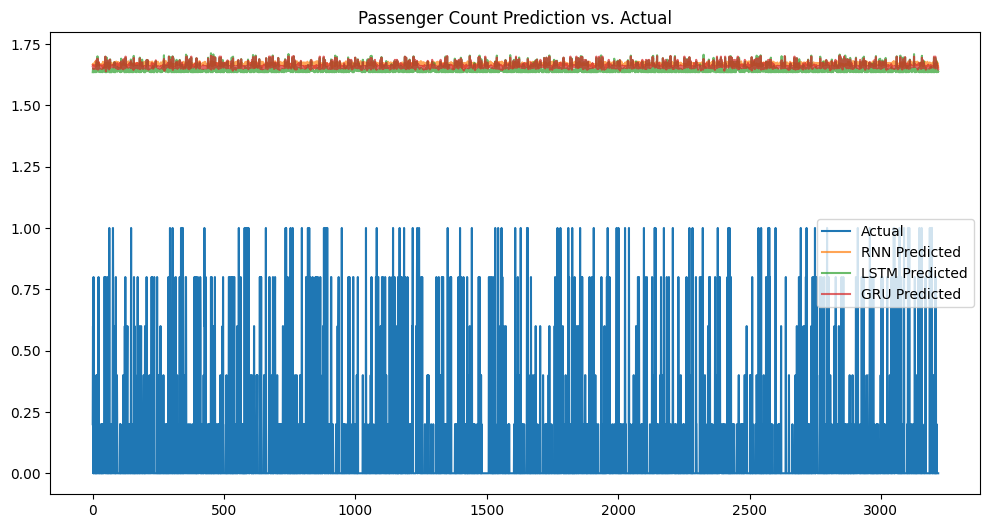

In [36]:
y_pred_rnn = model_rnn.predict(X_test.reshape(X_test.shape[0], X_test.shape[1], 1))
y_pred_rnn = scaler.inverse_transform(y_pred_rnn).flatten()

y_pred_lstm = model_lstm.predict(X_test.reshape(X_test.shape[0], X_test.shape[1], 1))
y_pred_lstm = scaler.inverse_transform(y_pred_lstm).flatten()

y_pred_gru = model_gru.predict(X_test.reshape(X_test.shape[0], X_test.shape[1], 1))
y_pred_gru = scaler.inverse_transform(y_pred_gru).flatten()

plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred_rnn, label='RNN Predicted', alpha=0.7)
plt.plot(y_pred_lstm, label='LSTM Predicted', alpha=0.7)
plt.plot(y_pred_gru, label='GRU Predicted', alpha=0.7)
plt.legend()
plt.title('Passenger Count Prediction vs. Actual')
plt.show()